**NL2DS - Winter 2025**

**Assignment 6 -- Language Phylogeny, Clustering**

This homework consists of 71 points, plus 4 points of extra credit.


There are two types of exercise:

* Some questions require writing code.  
  * Replace `# your code here` with your answer.  
  * The code block should run when all code above it in this file has also been run.  
  * If you skip some questions, it's your responsibility to make sure that all code blocks which you filled out still run.
* Some other questions require writing text.  
  * Replace "**put your answer here**" with your answer.

For coding questions:
* <font color='red'>**You may find code from the course CoLab notebooks -- and in particular the `Clustering` notebook (MyCourses->Content->Code Workbooks->Clustering) -- useful for this assignment.**</font>  
  * <font color='red'>**Do not reimplement any major functionality, such as calculating edit distance, linkage methods, clustering methods, etc.**</font>
* Following the contents of these CoLab notebooks, you should:
  * Use `sklearn` functionality as much as possible for machine learning tools. (For example, do not compute clusters using a different library.)
  * Use `pandas` functionalty as much as possible for basic data manipulation and analysis.
* Do not delete any code, unless it is marked as `# some code to get you started`.

Please make sure to follow directions carefully, including maximum lengths for text answers. Failure to follow directions may result in partial or no credit for the corresponding question.

**IMPORTANT: Make sure to correctly follow the instructions at the bottom on submitting your assignment, <font color='red'>INCLUDING MATCHING YOUR ANSWERS TO PDF PAGES WHEN SUBMITTING ON GRADESCOPE</font>. Failure to do so will result in <font color='red'>UP TO 10 POINTS BEING DEDUCTED</font>.**


# Section 1

In Sections 1-6 of the assignment we will look at some cross-linguistic word form data and use some of the tools we saw in class to build family trees of languages based on the sound forms of words---otherwise known as "optimal phylogenies."

We will use data from the following paper.


[Dellert, Johannes, Daneyko, T., Muench, A., Ladygina, A., Buch, A., Clarius, N., Grigorjew, I., Balabel, M., Boga, H. I., Baysarova, Z., Muehlenbernd, R., Wahle, J., and Jaeger, G. (2020). Northeuralex: A wide-coverage lexical database of northern eurasia. Language Resources & Evaluation, 54(273–301).](https://drive.google.com/file/d/1ptoMNctdJs99wPWfBUGbw4_X60NtKl9B/view?usp=sharing)

This data  can be found [here](http://northeuralex.org/) as well.

Copy the data to your drive folder from: [here](https://drive.google.com/file/d/1Mfa8XayBFJb0fY8wfinODw90yuRal8AD/view?usp=sharing), [here](https://drive.google.com/file/d/1AQqkscWKlq3quw-BWjB8xqSQzm7-uDtt/view?usp=sharing), and [here](https://drive.google.com/file/d/1R7ZLEzDW9QKUen3BjItPsySaUPCpu7xk/view?usp=sharing).

## Question 1 (3 points)

Read the paper and/or Northeuralex's website as much as necessary to answer this question.

**Question:** What is the Northeuralex dataset? Give a brief overview, including:
* What kind of data is it?
* What is the purpose of this data (what sorts of scientific questions or practical applications will it be used to address)?
* How was it constructed?

 Your answer should not refer to low-level details, such as file names or what columns are present in different files.  Just give an overview of no more than one paragraph that gives the gist for someone unfamiliar with the dataset.

**A1: put your answer here (maximum length 3-5 sentences)**
> The Northeurealex dataset is a lexicostatistical database that provides phonetic transcriptions of 100,000 words in 107 languages belonging to 21 language families. Unlike other datasets that focus on single language families, the dataset spans an entire geographical region(Northern Euroasia). Thus, the dataset supports reserch in historical linguistics by enabling cross-linguistic studies of vocabulary evalution, phonetic relationship, and loanword detection which was included in the 1.0 version. The dataset was constructed taking existing lexical resources as a reference and refined through expert and native speaker feedback. Therefore, the initial version of the model has a higher error rate compared to other datasets that build on expert contibutions of wordlists; however, it allows for easier improvements in the future revisions.

## Question 2 (3 points)

Now, let's read in the wordforms in this dataset.

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

import pandas as pd
wordforms=pd.read_csv("/content/drive/My Drive/northeuralex.csv")
display(wordforms)

Mounted at /content/drive/


,Language_ID,Glottocode,Concept_ID,Word_Form,rawIPA,IPA,ASJP,List,Dolgo,Next_Step
0,fin,finn1318,Auge::N,silmä,silmæ,s i l m æ,silmE,SILME,SVRMV,validate
1,fin,finn1318,Ohr::N,korva,kɔrʋɑ,k ɔ r ʋ ɑ,korwa,KURWA,KVRWV,validate
2,fin,finn1318,Nase::N,nenä,nɛnæ,n ɛ n æ,nEnE,NENE,NVNV,validate
3,fin,finn1318,Mund::N,suu,suː,s u u,su,SY,SV,validate
4,fin,finn1318,Zahn::N,hammas,hɑmːɑs,h ɑ m m ɑ s,hamas,HAMAS,HVMVS,validate
...,...,...,...,...,...,...,...,...,...,...
121608,cmn,mand1415,verkaufen::V,卖,mâɪ̯,m a ɪ,mai,MAI,MV,validate
121609,cmn,mand1415,bezahlen::V,付钱,fû t͡ɕʰjɛ̌n,f u _ t͡ɕ ʰ j ɛ n,fuCyEn,BY_CJE2N,PV_KJV1N,validate
121610,cmn,mand1415,zahlen::V,支付,t͡ʂɨ˦fû,t ʂ ɨ f u,C3fu,CI1BY,KV1PV,validate
121611,cmn,mand1415,beherrschen::V,统治,tʰʊ̂̌ŋt͡ʂɨ̂,tʰ ʊ ŋ t ʂ ɨ,tuNC3,TY2NCI,TV1NKV,validate


**Question:** Describe the meaning of the `Language_ID`, `Concept_ID`, `rawIPA` and `IPA` columns of the data.  Why are there separate `rawIPA` and `IPA` columns?

**A2: put your answer here (maximum 1 sentence per column, then one sentence for the "Why" question)**
1.   Language_ID: Shows the language in which the word form appears, (eg: fin for Finnish).
2.   Concept_ID: Shows the concept the word expresses, (eg: verkaufen::V	German lemma that specifies the concept of selling, V indicating the part of speech is verb)
3.   rawIPA: Automatically generated Internatinal Phonetic Alphabet transcription of the word.
4.   IPA: Cleaned and standardized version of rawIPA.

Why: rawIPA represents the automotic phonetic transcription while IPA is the cleaned and starndardized version used for analysis.

## Question 3 (2 points)

Now let's read in some metadata about the languages.

In [3]:
languages=pd.read_csv("/content/drive/My Drive/northeuralex-languages.csv")
display(languages)

,name,glotto_code,iso_code,family,subfamily,latitude,longitude
0,Finnish,finn1318,fin,Uralic,Finnic,61.0000,24.4500
1,North Karelian,kare1335,krl,Uralic,Finnic,65.1691,30.8655
2,Olonets Karelian,livv1243,olo,Uralic,Finnic,61.0000,33.0000
3,Veps,veps1250,vep,Uralic,Finnic,60.3353,34.7865
4,Estonian,esto1258,ekk,Uralic,Finnic,59.2500,24.7500
...,...,...,...,...,...,...,...
102,Dargwa,darg1241,dar,Nakh-Daghestanian,Daghestanian,42.4257,47.4388
103,Chechen,chec1245,che,Nakh-Daghestanian,Nakh,43.5000,45.5000
104,Standard Arabic,stan1318,arb,Afro-Asiatic,Semitic,27.9625,43.8525
105,Modern Hebrew,hebr1245,heb,Afro-Asiatic,Semitic,31.1056,35.0179


**Question:** Describe the meaning of the `family`, `iso_code`, and `subfamily` columns of the data.  

**A3: put your answer here (maximum 1 sentence per column)**
1.   family: Broader language family the language belongs to, (eg: Uralic, Afro-Asiatic, etc.)
2.   iso_code: standardized ISO 639-3 code identifying each language.
3.   subfamily: more specific categorization within the broader family that the language belongs to, (Finnic within Uralic).

## Question 4 (2 points)

Now let's read in some further data about the concepts.

In [4]:
concepts=pd.read_csv("/content/drive/My Drive/northeuralex-concepts.csv")
display(concepts)

,number,position_in_ranking,ranking_value,id_nelex,gloss_en,gloss_ru,annotation_en,annotation_en.1,annotation_ru,concepticon,concepticon_id,concepticon_proposed,comments
0,1,44,"-2,539237",Auge::N,eye,глаз,[[Anatomie]],[[anatomy]],[[анатомия]],EYE,1248,EYE,NaN
1,2,34,"-2,649194",Ohr::N,ear,ухо,[[Anatomie]],[[anatomy]],[[анатомия]],EAR,1247,EAR,NaN
2,3,149,"-1,995463",Nase::N,nose,нос,[[Anatomie]],[[anatomy]],[[анатомия]],NOSE,1221,NOSE,NaN
3,4,25,"-2,762589",Mund::N,mouth,рот,[[Anatomie]],[[anatomy]],[[анатомия]],MOUTH,674,MOUTH,NaN
4,5,31,"-2,670705",Zahn::N,tooth,зуб,[BSP:menschlicher Schneidezahn],[EX:human incisor],[НАПР:человека],TOOTH,1380,TOOTH,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1011,1012,140,"-2,029052",verkaufen::V,sell,продать,[BSP:Ware],[EX:goods],[НАПР:товар],SELL,1571,SELL,NaN
1012,1013,198,"-1,822012",bezahlen::V,pay for,заплатить,[BSP:Ware],[EX:goods],[НАПР:за товар],NaN,0,PAY_FOR,NaN
1013,1014,235,"-1,715766",zahlen::V,pay,платить,[BSP:im Restaurant],[EX:in a restaurant],[НАПР:в ресторане],PAY,718,PAY,NaN
1014,1015,899,"0,118183",beherrschen::V,rule,владеть,[BSP:Land],[EX:country],[НАПР:страной],RULE,1846,RULE,NaN


**Question:** Describe the meaning of the `id_nelex`, `gloss_en`, and `position_in_ranking` columns of the data.

**A4: put your answer here (maximum 1 sentence per column)**
1.   id_nelex: Identifier for concepts in the dataset consisting of a German lemma and part of speech(eg: Auge::N specifies eye and part of speech is noun)
2.   gloss_en:  English translation of the concept (eye, ear, sell, etc.)
3.   position_in_ranking: Indicates lexically basicality of the words lower numbers corresponding to core/basic vocabulary.

# Section 2

## Question 5 (2 points)

It will be useful to merge all of the meta-information into the main wordforms dataframe.

In [5]:
# Question-a: rename the appropriate columns in the languages and concepts dataframes to make this merge possible.
# your code here
languages = languages.rename(columns={'iso_code': 'Language_ID'})
concepts = concepts.rename(columns={'id_nelex': 'Concept_ID'})

# Question-b: Use the pd.merge function to merge the three dataframes into one.
# your code here
wordforms = pd.merge(wordforms, languages, on='Language_ID', how='left')
wordforms = pd.merge(wordforms, concepts, on='Concept_ID', how='left')

display(wordforms)

,Language_ID,Glottocode,Concept_ID,Word_Form,rawIPA,IPA,ASJP,List,Dolgo,Next_Step,...,ranking_value,gloss_en,gloss_ru,annotation_en,annotation_en.1,annotation_ru,concepticon,concepticon_id,concepticon_proposed,comments
0,fin,finn1318,Auge::N,silmä,silmæ,s i l m æ,silmE,SILME,SVRMV,validate,...,"-2,539237",eye,глаз,[[Anatomie]],[[anatomy]],[[анатомия]],EYE,1248,EYE,NaN
1,fin,finn1318,Ohr::N,korva,kɔrʋɑ,k ɔ r ʋ ɑ,korwa,KURWA,KVRWV,validate,...,"-2,649194",ear,ухо,[[Anatomie]],[[anatomy]],[[анатомия]],EAR,1247,EAR,NaN
2,fin,finn1318,Nase::N,nenä,nɛnæ,n ɛ n æ,nEnE,NENE,NVNV,validate,...,"-1,995463",nose,нос,[[Anatomie]],[[anatomy]],[[анатомия]],NOSE,1221,NOSE,NaN
3,fin,finn1318,Mund::N,suu,suː,s u u,su,SY,SV,validate,...,"-2,762589",mouth,рот,[[Anatomie]],[[anatomy]],[[анатомия]],MOUTH,674,MOUTH,NaN
4,fin,finn1318,Zahn::N,hammas,hɑmːɑs,h ɑ m m ɑ s,hamas,HAMAS,HVMVS,validate,...,"-2,670705",tooth,зуб,[BSP:menschlicher Schneidezahn],[EX:human incisor],[НАПР:человека],TOOTH,1380,TOOTH,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121608,cmn,mand1415,verkaufen::V,卖,mâɪ̯,m a ɪ,mai,MAI,MV,validate,...,"-2,029052",sell,продать,[BSP:Ware],[EX:goods],[НАПР:товар],SELL,1571,SELL,NaN
121609,cmn,mand1415,bezahlen::V,付钱,fû t͡ɕʰjɛ̌n,f u _ t͡ɕ ʰ j ɛ n,fuCyEn,BY_CJE2N,PV_KJV1N,validate,...,"-1,822012",pay for,заплатить,[BSP:Ware],[EX:goods],[НАПР:за товар],NaN,0,PAY_FOR,NaN
121610,cmn,mand1415,zahlen::V,支付,t͡ʂɨ˦fû,t ʂ ɨ f u,C3fu,CI1BY,KV1PV,validate,...,"-1,715766",pay,платить,[BSP:im Restaurant],[EX:in a restaurant],[НАПР:в ресторане],PAY,718,PAY,NaN
121611,cmn,mand1415,beherrschen::V,统治,tʰʊ̂̌ŋt͡ʂɨ̂,tʰ ʊ ŋ t ʂ ɨ,tuNC3,TY2NCI,TV1NKV,validate,...,"0,118183",rule,владеть,[BSP:Land],[EX:country],[НАПР:страной],RULE,1846,RULE,NaN


## Question 6 (2 points)

In this problem set, we will make use of the `lingpy` package of tools for historical linguistics. You can find more information on this [here](ttps://lingpy.org/index.html). We'll start by installing the package.

In [6]:
!pip install lingpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 11.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 602.4/602.4 kB 33.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 55.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.9/59.9 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.7/93.7 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.4/81.4 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.4/213.4 kB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 561.4/561.4 kB 33.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 565.1/565.1 kB 30.9 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=cb51248cfe6ccf7d8338845986112d39854bc79194881ab34b48bd26b63d2fe5
  Stored in directory: /root/.cache/pip/wheels/b1/7a/33/9fdd892f784ed4afda62b685ae3

In order to make our computations below more manageable, we will focus on the **Indo-European** languages which you can read more about [here](https://en.wikipedia.org/wiki/Indo-European_languages). We will also focus just on the top 20 concepts as determined by their rank. Please do not make any changes to the `wordforms` dataframe, and instead, create a new dataframe called `wordforms_20`.

In [7]:
# Question-a: Filter out the non-Indo-European languages from the dataframes
# your code here
wordforms_indo_european = wordforms[wordforms["family"] == "Indo-European"]

# Question-b: Filter the concepts to include those less than or equal to rank 20 in the dataframe.
# your code here
wordforms_20 = wordforms_indo_european[wordforms_indo_european["position_in_ranking"] <= 20]

display(wordforms_20)

,Language_ID,Glottocode,Concept_ID,Word_Form,rawIPA,IPA,ASJP,List,Dolgo,Next_Step,...,ranking_value,gloss_en,gloss_ru,annotation_en,annotation_en.1,annotation_ru,concepticon,concepticon_id,concepticon_proposed,comments
30428,ben,beng1280,Wasser::N,জল,d͡ʒɔl,d͡ʒ ɔ l,jol,CUL,KVR,validate,...,"-2,92383",water,вода,[kaltes Wasser],[cold water],[холодная вода],WATER,948,WATER,NaN
30571,ben,beng1280,Sohn::N,ছেলে,t͡ʃʰele,t͡ʃ ʰ e l e,Cele,CELE,KVRV,validate,...,"-2,902475",son,сын,[],[],[],SON,1620,SON,NaN
30823,ben,beng1280,Tag::N,দিন,d̪in,d i n,din,TIN,TVN,validate,...,"-3,008012",day,день,[],[],[],DAY_(NOT_NIGHT),1225,DAY_(NOT_NIGHT),NaN
30982,ben,beng1280,hier::ADV,এখানে,ekʰane,e kʰ a n e,ekane,EKANE,VKVNV,validate,...,"-2,945985",here,здесь,[],[],[],HERE,136,HERE,NaN
30985,ben,beng1280,dort::ADV,ওখানে,okʰane,o kʰ a n e,okane,UKANE,VKVNV,validate,...,"-2,964168",there,там,[],[],[],THERE,1937,THERE,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73176,ron,roma1327,zwei::NUM,doi,doj,d o j,doy,TUJ,TVJ,validate,...,"-3,252278",two,два,[],[],[],TWO,1498,TWO,NaN
73184,ron,roma1327,zehn::NUM,zece,zet͡ʃe,z e t͡ʃ e,zeCe,SECE,SVKV,validate,...,"-3,174243",ten,десять,[],[],[],TEN,1515,TEN,NaN
73320,ron,roma1327,kommen::V,veni,venʲ,v e nʲ,ven,BEN,WVN,validate,...,"-2,955592",come,прийти,[sich hierher begeben],[move here],[двигаться сюда],COME,1446,COME,NaN
73456,ron,roma1327,nehmen::V,lua,lwa,l w a,lwa,LWA,RWV,validate,...,"-3,037664",take,взять,[],[],[],TAKE,1749,TAKE,NaN


# Section 3

## Question 7 (6 points)

Our goal is to use agglomerative clustering to try to reconstruct the tree for the Indo-European languages. You can find a reference tree (for families) [here](https://en.wikipedia.org/wiki/Indo-European_languages#/media/File:IndoEuropeanLanguageFamilyRelationsChart.jpg).

In order to do this, we will need to construct a  matrix of similarities between the languages, called a confusion matrix.

We will compute the (normalized) levenshtein distance between the strings for each concept for each pair of languages. For instance, we will compute the normalized levenshtein distance between the words for Wasser::N (water in English) for German and English and then similarily for all 19 other concepts. If there are multiple words for the same concept, take the average across all pair possibilities. We will then average these values (i.e., average across all concepts) to find the similarity between German and English. We will do this for all pairs of languages to create a list of lists representing the confusion matrix.

Note that running your code will take a few minutes.

**Hint**: Make use of the `lp.align.pairwise.edit_dist` function from lingpy.

In [8]:
import lingpy as lp
import numpy as np

# Question: fill the confusion matrix on the "IPA" fields for each language.

# Initialize confusion matrix
language_list = sorted(wordforms_20["Language_ID"].unique().tolist())
confusion = [[0 for j in range(len(language_list))] for i in range(len(language_list))]
grouped = wordforms_20.groupby(["Language_ID", "Concept_ID"])["IPA"].apply(list).to_dict()

# your code here; some code to get you started:
for i, language1 in enumerate(language_list):
    for j, language2 in enumerate(language_list):
        if i > j:
            confusion[i][j] = confusion[j][i]  # symmetry
            continue

        distances = []

        for concept in wordforms_20["Concept_ID"].unique():
            word_list_1 = grouped.get((language1, concept), [])
            word_list_2 = grouped.get((language2, concept), [])

            if not word_list_1 or not word_list_2:
                continue

            levenshtein_distances = []
            for word1 in word_list_1:
                for word2 in word_list_2:
                    # Use list(word) to split IPA into characters for alignment
                    distance = lp.align.pairwise.edit_dist(list(word1), list(word2), normalized=True)
                    levenshtein_distances.append(distance)

            if levenshtein_distances:
                distances.append(np.mean(levenshtein_distances))

        if distances:
            confusion[i][j] = np.mean(distances)


2025-04-06 22:18:31,564 [INFO] Compiling diacritics and vowels...
2025-04-06 22:18:31,569 [INFO] Diacritics and sound classes were successfully compiled.
2025-04-06 22:18:31,571 [INFO] Compiling model <asjp>...
2025-04-06 22:18:31,574 [INFO] ('ǃ', '!')
2025-04-06 22:18:31,575 [INFO] ('ǂ', '!')
2025-04-06 22:18:31,577 [INFO] ('ǁ', '!')
2025-04-06 22:18:31,579 [INFO] ('ǀ', '!')
2025-04-06 22:18:31,580 [INFO] ('ʘ', '!')
2025-04-06 22:18:31,581 [INFO] ('gǃ', '!')
2025-04-06 22:18:31,583 [INFO] ('gǂ', '!')
2025-04-06 22:18:31,584 [INFO] ('gǁ', '!')
2025-04-06 22:18:31,585 [INFO] ('gǀ', '!')
2025-04-06 22:18:31,586 [INFO] ('gʘ', '!')
2025-04-06 22:18:31,587 [INFO] ('ǃŋ', '!')
2025-04-06 22:18:31,589 [INFO] ('ǂŋ', '!')
2025-04-06 22:18:31,589 [INFO] ('ǁŋ', '!')
2025-04-06 22:18:31,591 [INFO] ('ǀŋ', '!')
2025-04-06 22:18:31,592 [INFO] ('ʘŋ', '!')
2025-04-06 22:18:31,593 [INFO] ('!', '!')
2025-04-06 22:18:31,594 [INFO] ('|', '!')
2025-04-06 22:18:31,595 [INFO] ('g!', '!')
2025-04-06 22:18:31,59

**After running this cell, clear the *output* of the above cell (by clicking on the cross at top left of the output part) so that it doesn't clutter the pdf.**

## Question 8 (2 points)

Now that we have computed a matrix of similarities, we can use clustering algorithms to try to build phylogenetic trees representing the languages historical relationships. First, let's use the `lp.algorithm.clustering.flat_cluster` function from `lingpy` to derive a flat clustering of languages.


In [9]:
cluster = lp.algorithm.clustering.flat_cluster('upgma', 0.6, confusion, language_list)
print(cluster)

{1: ['ben', 'hin'], 2: ['bre', 'cym'], 4: ['cat', 'spa', 'por', 'ita', 'ron'], 7: ['dan', 'nor', 'swe', 'isl', 'deu', 'nld', 'eng'], 9: ['ell'], 11: ['fra'], 12: ['gle'], 15: ['hye'], 18: ['kmr', 'pes'], 19: ['lat'], 20: ['lav', 'lit', 'bel', 'rus', 'ces', 'pol', 'slk', 'ukr', 'bul', 'hrv', 'slv'], 24: ['oss'], 25: ['pbu'], 34: ['sqi']}


**Question:** Do you recognize any of the clusters of languages? Are there any noteworthy errors in this clustering?  (You may first need to learn a bit about Indo-European languages.)

**A8: put your answer here (maximum 3 sentences)**
> Languages were grouped into 14 different clusters. Although all these languages belong to the IndoEuropean family, they are within subfamilies within this wide family such as Germanic(eng: English, deu: German, etc.), Slavic(pol: Polish, rus: Russian, etc.), Romance(ita: Italian, spa: Spanish, etc.) A noteworthy error is that fra(French), despite being a Romance language, was clustered individually.


# Section 4

## Question 9 (2 points)

Now we will build our own dendrogram using the clustering algorithms available in [`scipy`](https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html). You can read in particular about the [`linkage`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html) function and the [`dendrogram`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html) function.

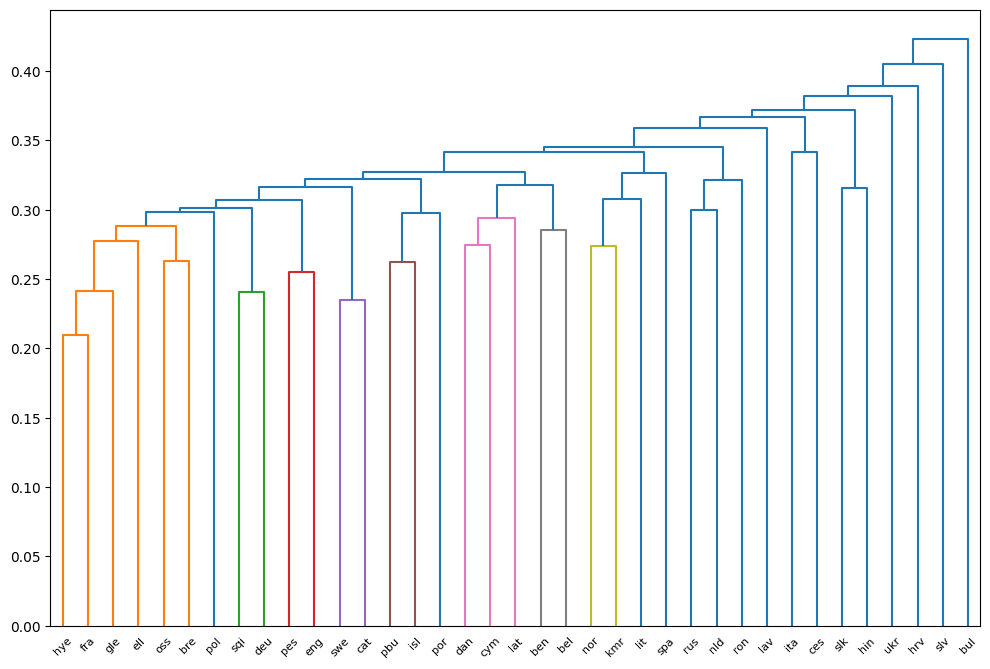

In [10]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import v_measure_score
import matplotlib.pyplot as plt

# Question: use the linkage function with the average linkage method to compute the clustering.

# your code here; some code to get you started:
distance_matrix = [[1 - val for val in row] for row in confusion]

distance2 = []
for i in range(len(distance_matrix)):
    for j in range(i + 1, len(distance_matrix)):
        distance2.append(distance_matrix[i][j])

linked = linkage(distance2, method='average')


# Plot the results using dendrogram
def llf(id): return language_list[id]
plt.figure(figsize=(12, 8))
dendrogram(linked,
           p=100,
           truncate_mode="level",
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=False,
           leaf_label_func=llf)

plt.show()

## Question 10 (2 points)

**Question:** Do you recognize any of the clusters of languages at any of the levels? Are there any noteworthy errors in this clustering?

**A10: put your answer here (maximum 3 sentences)**
> Slavic languages such as rus(Russian), ukr(Ukranian), hrv(Croatian), bul(Bulgarian), etc. were correctly clustered together while Germanic languages like deu(German), eng(English), swe(Swedish) show close proximity. However, a noteworthy error is fra(French) which is a Romance language being clustered with hye(Armenian), ell(Greek), and gle(Irish). French is not historically or linguistically related to these languages; however, there might be a surface-level phonological similarity reflected on the results.

# Section 5

## Question 11 (4 points)
(2 points for code, 2 points for text answer)

**Question-a:** Try two of the other linkage methods.

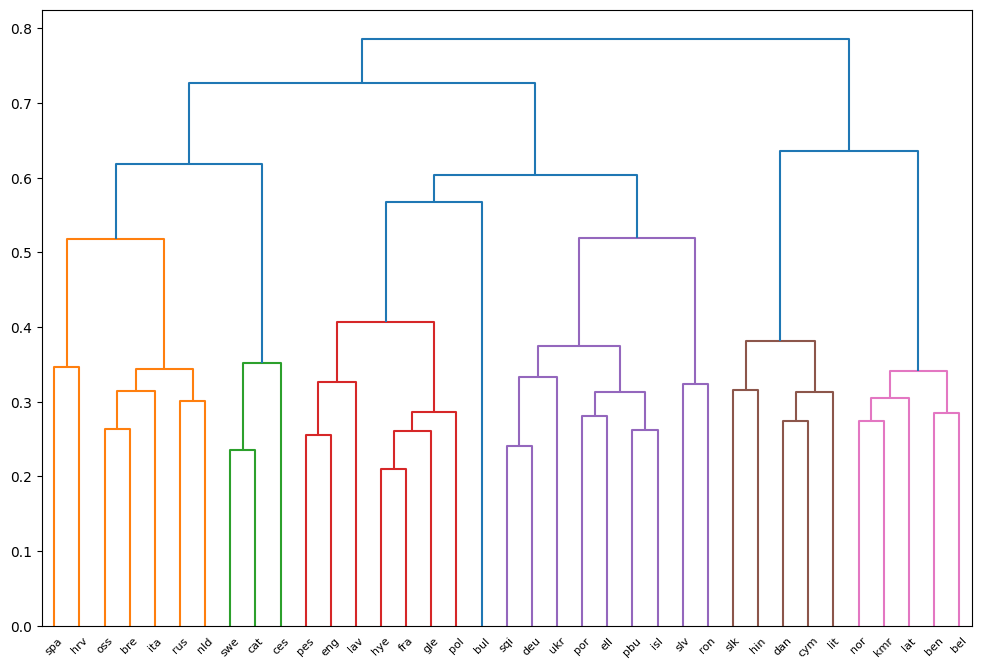

In [11]:
# Question-a: other method 1
# your code here
linked_complete = linkage(distance2, method='complete')


# Plot the results using dendrogram
def llf(id): return language_list[id]
plt.figure(figsize=(12, 8))
dendrogram(linked_complete,
           p=100,
           truncate_mode="level",
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=False,
           leaf_label_func=llf)

plt.show()

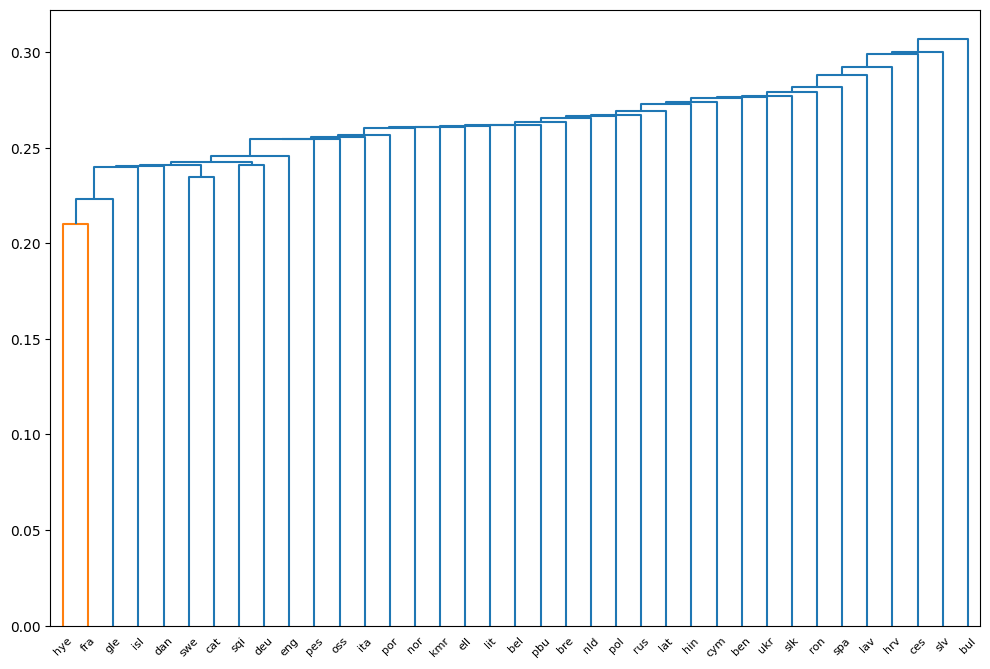

In [12]:
# Question-a: other method 2
# your code here
linked_single = linkage(distance2, method='single')


# Plot the results using dendrogram
def llf(id): return language_list[id]
plt.figure(figsize=(12, 8))
dendrogram(linked_single,
           p=100,
           truncate_mode="level",
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=False,
           leaf_label_func=llf)

plt.show()

**Question-b:** Describe how they change the results.

**A11: Put your answer here (maximum 4 sentences). Include all the code in separate cells.**
> Changing the method to single groups all languages except for hye(Armenian) into a single cluster. We can conclude that this method is not ideal for our study purposes.

> Changing the method to complete on the other hand results on a more balanced dendrogram where subfamilies like Romance(spa, ita) are somewhat identifiable but they're clustered together with Slavic languages(rus, hrv). We can conclude that average linkage method is better to identify subfamilies among the 3 methods.

## Question 12 (4 points)
(2 points for code, 2 points for text answer)

**Question-a:** Try increasing the number of concepts we use to compute our confusion matrix to be **50**.

**Note:** Include all the code in separate cells like below. Make sure to define new variables so the previous variables (e.g., `wordforms_20`, `language_list`, `confusion` matrix, etc.) are not re-assigned.

{0: ['bel', 'rus', 'ukr', 'bul', 'ces', 'pol', 'slk', 'hrv', 'slv'], 1: ['ben', 'hin'], 2: ['bre', 'cym'], 4: ['cat', 'ita', 'por', 'spa', 'ron'], 7: ['dan', 'nor', 'swe', 'isl', 'deu', 'nld', 'eng'], 9: ['ell'], 11: ['fra'], 12: ['gle'], 15: ['hye'], 18: ['kmr', 'pes'], 19: ['lat', 'lav', 'lit'], 24: ['oss'], 25: ['pbu'], 34: ['sqi']}


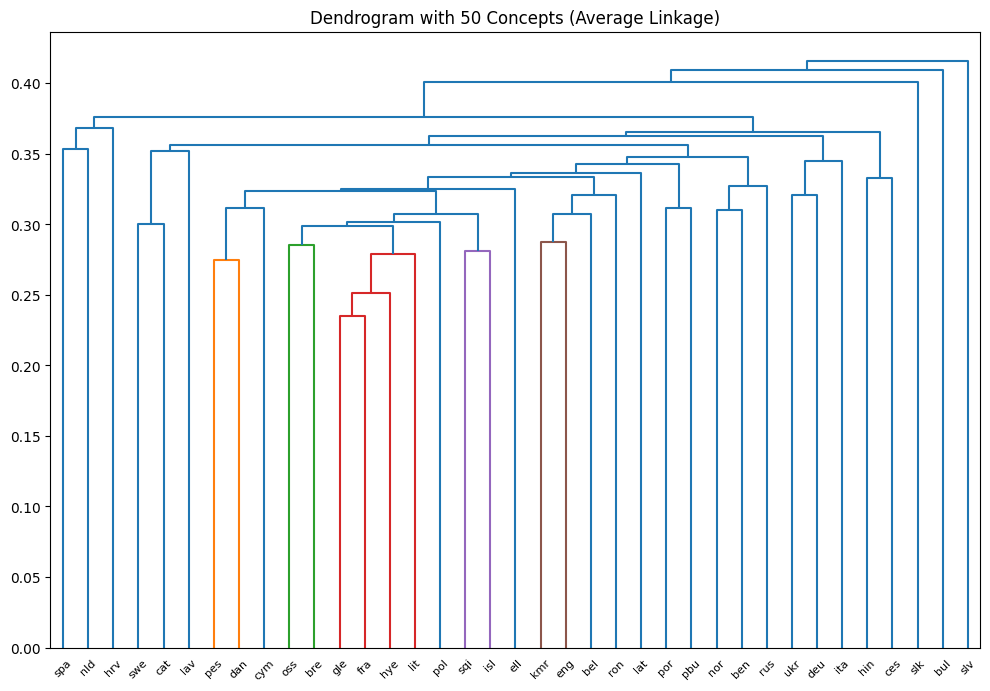

In [13]:
# Question-a
# your code here
wordforms_indo_european = wordforms[wordforms["family"] == "Indo-European"]
wordforms_50 = wordforms_indo_european[wordforms_indo_european["position_in_ranking"] <= 50]

language_list_50 = sorted(wordforms_50["Language_ID"].unique().tolist())
confusion_50 = [[0 for j in range(len(language_list_50))] for i in range(len(language_list_50))]
grouped_50 = wordforms_50.groupby(["Language_ID", "Concept_ID"])["IPA"].apply(list).to_dict()

for i, language1 in enumerate(language_list_50):
    for j, language2 in enumerate(language_list_50):
        if i > j:
            confusion_50[i][j] = confusion_50[j][i]  # symmetry
            continue

        distances = []

        for concept in wordforms_50["Concept_ID"].unique():
            word_list_1 = grouped_50.get((language1, concept), [])
            word_list_2 = grouped_50.get((language2, concept), [])

            if not word_list_1 or not word_list_2:
                continue

            levenshtein_distances = []
            for word1 in word_list_1:
              for word2 in word_list_2:
                if not isinstance(word1, str) or not isinstance(word2, str):
                  continue  # skip non-string IPA entries (e.g., NaN)
                distance = lp.align.pairwise.edit_dist(list(word1), list(word2), normalized=True)
                levenshtein_distances.append(distance)

            if levenshtein_distances:
                distances.append(np.mean(levenshtein_distances))

        if distances:
            confusion_50[i][j] = np.mean(distances)

cluster_50 = lp.algorithm.clustering.flat_cluster('upgma', 0.6, confusion_50, language_list_50)
print(cluster_50)

distance_matrix_50 = [[1 - val for val in row] for row in confusion_50]

distance2_50 = []
for i in range(len(distance_matrix_50)):
    for j in range(i + 1, len(distance_matrix_50)):
        distance2_50.append(distance_matrix_50[i][j])

linked_50 = linkage(distance2_50, method='average')

def llf(id): return language_list_50[id]
plt.figure(figsize=(12, 8))
dendrogram(linked_50,
           p=100,
           truncate_mode="level",
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=False,
           leaf_label_func=llf)

plt.title("Dendrogram with 50 Concepts (Average Linkage)")
plt.show()

**Question-b:** Does increasing from top 20 concepts to top 50 change the results?

**A12: Put your answer here (maximum 3 sentences).**
The clustering was almost the same except for lat(Latin), lav(Latvian), lit(Lithuanian) being grouped together into their own cluster when we used 50 concepts while lav(Latvian) and lit(Lithuanian) were grouped together with other Slavic languages when 20 top concepts were used. This reflects the distinction between Baltic branch of Slavic languages and other Slavic languages. However, using top 50 concepts also resulted in Latin which is a classical/dead language being clustered together with the Baltic branch.

# Section 6

Let's evaluate the quality of the clustering from Question 8, relative to one of the class labels we have: `subfamily`. In other words: the clustering we implement in Question 8 gives us some clusters of languages, that you may recognize as relating to language families/subfamilies. Given the ground truth we have in the `subfamily` labels, how well does our clustering do?

## Question 13 (6 points)
(4 points for code, 2 points for text answer)

Write code to compute the V measure score for this clustering relative to `subfamily`, then print them. Note that when using the `v_measure_score` function, you DO NOT need to standardize and align the cluster names/labels. (For example, it's okay if your 'true' cluster labels are encoded as strings, and your 'predicted' cluster labels are encoded as integers.)

In [14]:
# Question-a
# save the V measure score as v_measure_subfamily
# Hint: computing subfamily may require more than a couple lines of code.

from sklearn.metrics import v_measure_score
# your code here
language_subfamily_match = wordforms_20.groupby("Language_ID")["subfamily"].first().to_dict()

true = []
predicted = []

for cluster_number, languages in cluster.items():
    for language in languages:
        if language in language_subfamily_match:
            true.append(language_subfamily_match[language])
            predicted.append(cluster_number)

v_measure_subfamily = v_measure_score(true, predicted)
print(v_measure_subfamily)

0.9229765907369317


**Question-b:** Intrepret the `v_measure_subfamily` you printed above. Was your clustering in Question 8 good enough?

**A13: Put your answer here (maximum 2 sentences).**
> The v_measure_subfamily score is approximately 0.92 which indicates a strong match between true clusters and predicted clusters. Therefore, it can safely be said that the clustering in Question 8 is good enough.

# Section 7

In the remainder of this assignment, you'll use vowel duration and formant data like **the Classification and Clustering notebooks (MyCourses -> Content -> Code Workbooks)**---except from a mystery language, where the labels are unknown.  

Our data file, `mystery_vowels.csv`, gives duration, F1, F2, F3, and F4 values for vowel measurements from this language.  Note the lack of `speaker` and `vowel` columns: you don't know how many speakers this data came from and how many vowel categories there are.

Your goal is to determine $k$, the number of vowel categories.

Copy the data to your Drive folder from [here](https://drive.google.com/file/d/1lL62Su-GGSNZTzvp-7MgWLmZQXVBvPhm/view?usp=sharing).


In [15]:
# This cell throws an error if your Drive folder doesn't contain mystery_vowels.csv
from google.colab import drive
drive.mount('/content/drive/')
!ls "/content/drive/My Drive/mystery_vowels.csv"


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
'/content/drive/My Drive/mystery_vowels.csv'


Load the data:

In [16]:
import pandas as pd
mystery_vowels = pd.read_csv("/content/drive/My Drive/mystery_vowels.csv")

display(mystery_vowels)


,dur,F1,F2,F3,F4
0,72.842105,560.789474,1308.052632,2174.789474,3430.157895
1,103.264151,637.358491,1313.094340,2145.320755,3398.566038
2,154.130435,514.652174,1631.217391,2394.652174,3384.173913
3,153.190476,315.857143,2042.190476,2614.714286,3398.857143
4,99.733333,539.533333,1031.466667,2047.000000,3221.466667
...,...,...,...,...,...
115,91.670213,621.234043,1373.117021,2472.691489,3409.840426
116,80.571429,527.047619,1755.571429,2605.095238,3500.119048
117,94.387097,374.048387,2029.306452,2685.483871,3479.080645
118,97.612903,518.838710,1071.129032,2600.193548,3356.806452


We will call this data `X`, just for consistency with our other CoLab notebooks.

In [17]:
X = mystery_vowels

Plot the data:  

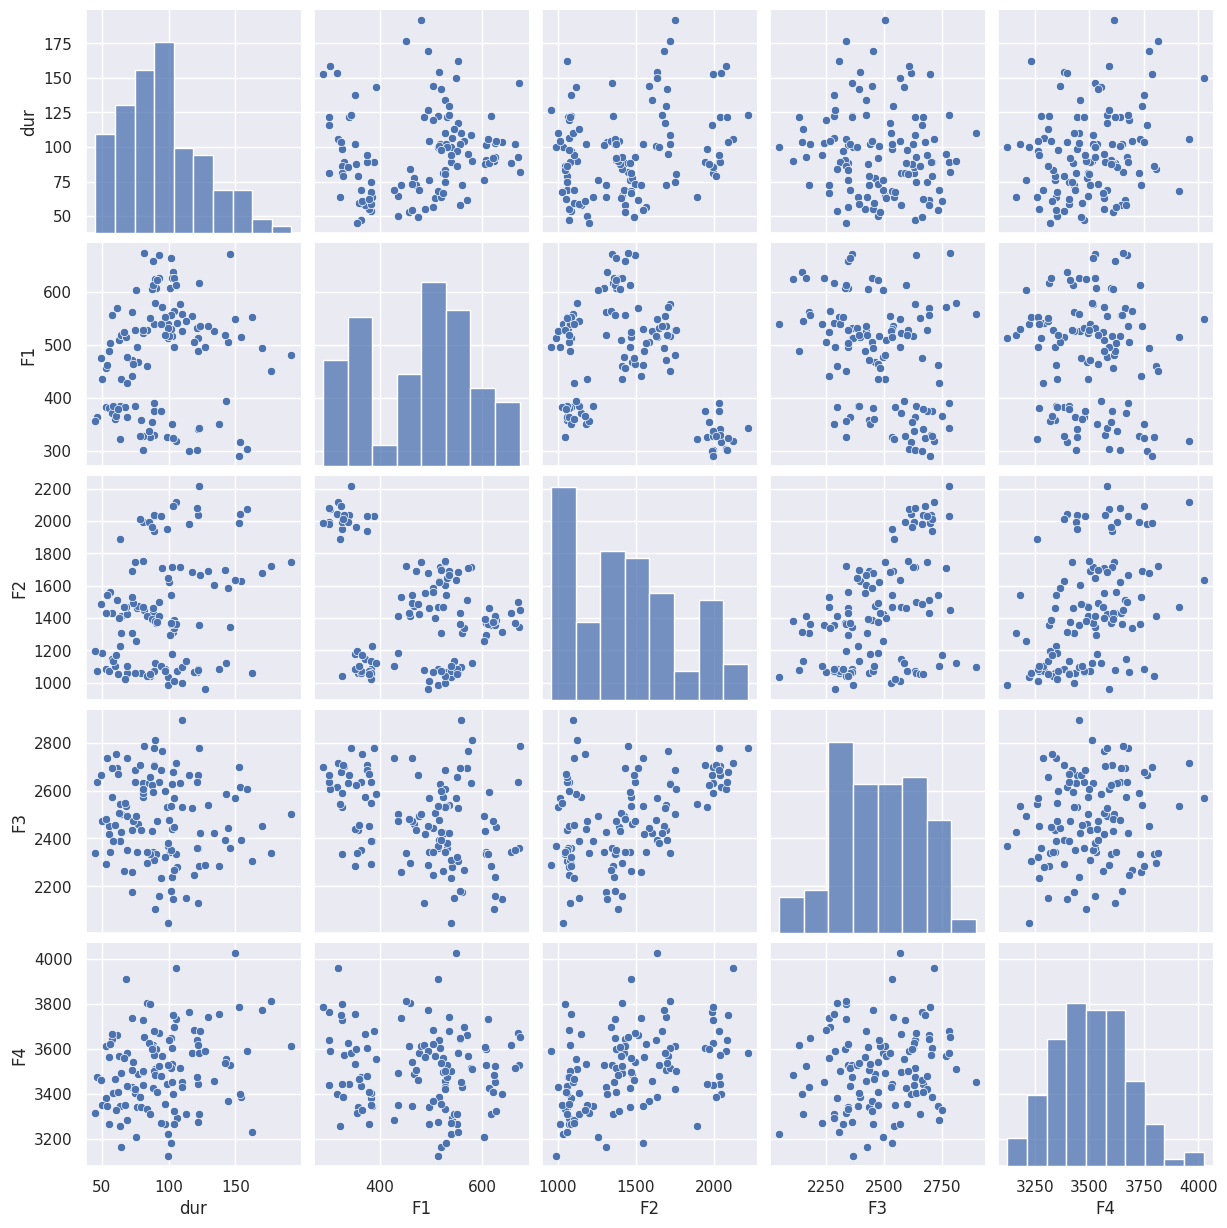

In [18]:
import seaborn as sns; sns.set()
sns.pairplot(X, vars=['dur', 'F1', 'F2','F3','F4'])

Note that we don't color by `vowel` label, unlike the English vowels data, because we don't know what vowel each token correpsonds to.

## Question 14 (2 points)

Choose two variables (= a diagonal panel) or pairs of variables (= an off-diagonal panel) where the data looks _most_ separated into clusters.  What two panels did you choose, and what values of $k$ do you guess?

**A14: put your answer here as a list with two bullet points (maximum 1 sentence per bullet point)**


1.   F1 vs. F2: The panel shows clear separation into clusters with an estimated k value of 5.
2.   F2 vs. F3: The panel shows somewhat clear separation into clusters with an estimated k value of 5 or 6.




## Question 15 (2 points)

When working with the English vowel data, we got the best performance by normalizing each column of `X` in a specific way.  Explain why it isn't possible to perform this normalization for our current dataset.

**A15: put your answer here (maximum 1 sentence )**
> Since vowel and speaker labels are missing in mystery_vowels.csv, speaker-specific vowel formant normalization isn't possible, so k can be determined using unsupervised clustering methods.

# Section 8

We will try two methods for determining the number of categories: $k$-means and GMM clustering.   

**Notes for the remainder of this assignment**:

* Every time you run $k$-means or GMM clustering, you should use the arguments `n_init = 10` and `random_state = 42`.  
  * These values make sure that your clustering finds the global minimum, and that we'll get the same "random" value for grading purposes.

* Any method you use should not divide the data (i.e. into train/test or "folds" for cross-validation): we are training and testing on the same data.

  * This makes the code maximally parallel to the Classification CoLab notebook.



## Question 16 (2 points)

As a warm-up, let's do $k$-means clustering with the value of $k$ that seems most likely to you from Q14.  

Define a variable  `k_q14`which is set to your guess for $k$.

Then:

* Perform $k$-means clustering using this $k$, and save the result as `kmeans_q16`.
* Make a vector `y_kmeans_q16` of the category labels predicted by this clustering.

In [20]:
# Question
# Make sure to use the arguments `n_init = 10` and `random_state = 42` for clustering

# your code here
from sklearn.cluster import KMeans

k_q14 = 5

kmeans_q16 = KMeans(n_clusters=k_q14, n_init=10, random_state=42)
kmeans_q16.fit(mystery_vowels)

y_kmeans_q16 = kmeans_q16.labels_

print(y_kmeans_q16)

[0 0 3 1 2 2 0 0 3 1 2 2 3 0 3 1 2 2 3 0 3 1 2 2 3 0 3 1 2 4 3 0 3 1 2 2 3
 3 3 1 4 4 3 3 3 1 4 2 3 0 3 1 2 4 2 2 3 1 4 4 0 0 3 1 0 0 0 0 3 1 0 0 3 0
 3 1 4 4 3 0 3 1 2 2 3 0 3 1 2 4 3 0 3 1 2 2 3 0 3 1 2 4 0 0 3 1 2 4 3 3 3
 1 4 4 3 0 3 1 4 4]


## Question 17 (3 points)

Make a 1x2 array of F1/F2 plots showing:

* Each point, colored by its value of `y_kmeans_q16` (the predicted category label) (left plot)
* A Voronoi diagram showing the centroid of each cluster and the boundaries between clusters  (right plot)

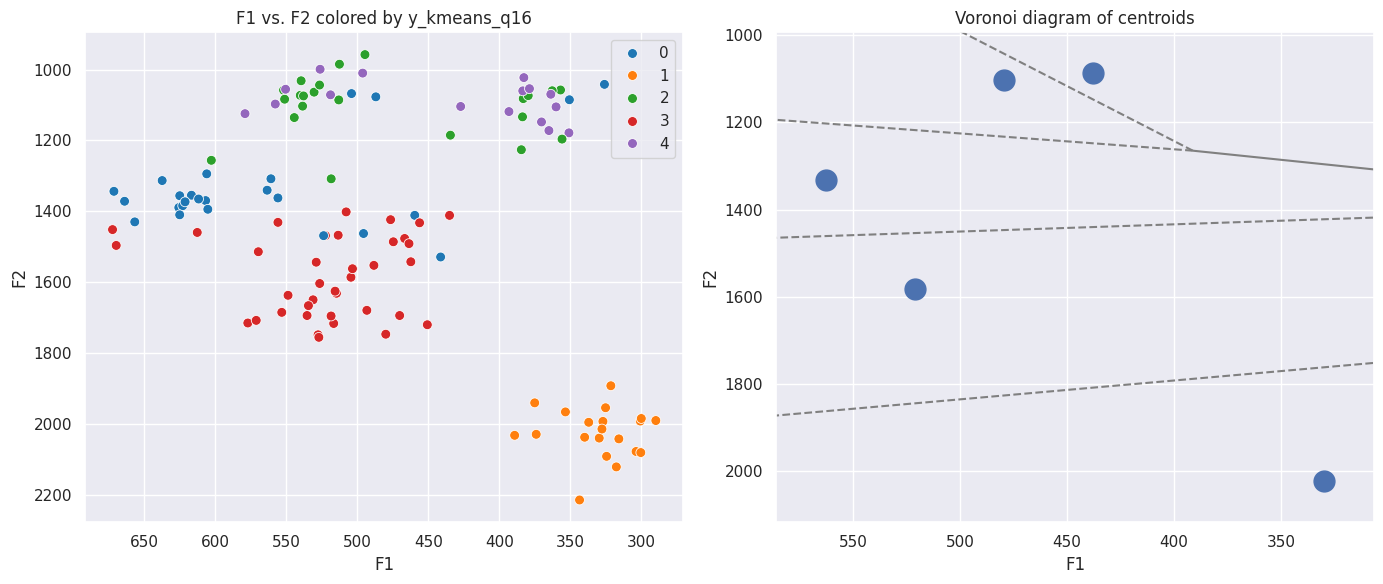

In [22]:
# Question

# your code here
from scipy.spatial import Voronoi, voronoi_plot_2d

f1 = mystery_vowels["F1"].values
f2 = mystery_vowels["F2"].values

centroids = kmeans_q16.cluster_centers_[:, [1, 2]]

fig, subplot_array = plt.subplots(1, 2, figsize=(14, 6))

sns.scatterplot(x=f1, y=f2, hue=y_kmeans_q16, palette="tab10", ax=subplot_array[0], s=50)
subplot_array[0].set_title("F1 vs. F2 colored by y_kmeans_q16")
subplot_array[0].invert_xaxis()
subplot_array[0].invert_yaxis()
subplot_array[0].set_xlabel("F1")
subplot_array[0].set_ylabel("F2")

voronoi = Voronoi(centroids)
voronoi_plot_2d(voronoi, ax=subplot_array[1], show_vertices=False, line_colors='gray', line_width=1.5, point_size=30)
subplot_array[1].scatter(centroids[:, 0], centroids[:, 1], color='red', marker='X', s=100)
subplot_array[1].set_title("Voronoi diagram of centroids")
subplot_array[1].invert_xaxis()
subplot_array[1].invert_yaxis()
subplot_array[1].set_xlabel("F1")
subplot_array[1].set_ylabel("F2")

plt.tight_layout()
plt.show()

These plots should be legible, as discussed for Homework 5.

## Question 18 (2 points)

For the purposes of this homework, suppose that possible values of $k$ are 3--15.  The vast majority of human languages have a number of vowel categories in this range.

To determine the best value of $k$, we perform Silhouette analysis.  First, write code resulting in a dictionary `silhouette_scores` such that:

* `silhouette_scores[3]` is the mean Silhouette coefficient across all observations for the $k$-means clustering with $k = 3$
* `silhouette_scores[4]` is the same for $k=4$
* etc.


In [23]:
# Question
# Make sure to use the arguments `n_init = 10` and `random_state = 42` for clustering

# your code here
from sklearn.metrics import silhouette_score

silhouette_scores = {}

for k in range(3, 16):
    k_means = KMeans(n_clusters=k, n_init=10, random_state=42)
    labels = k_means.fit_predict(mystery_vowels)
    result = silhouette_score(mystery_vowels, labels)
    silhouette_scores[k] = result

print(silhouette_scores)

{3: np.float64(0.3727077659683769), 4: np.float64(0.333266504720069), 5: np.float64(0.32137602309666763), 6: np.float64(0.30445427290954025), 7: np.float64(0.31307091256639946), 8: np.float64(0.3224371666709743), 9: np.float64(0.29956315786022797), 10: np.float64(0.2928349984292228), 11: np.float64(0.3135190238548203), 12: np.float64(0.2961450064067156), 13: np.float64(0.31940576486353034), 14: np.float64(0.28736345502468713), 15: np.float64(0.3002068632565605)}


## Question 19 (2 points)

Run the following code, which should generate a figure showing the Silhouette coefficient ($y$-axis) as a function of $k$ ($x$-axis):

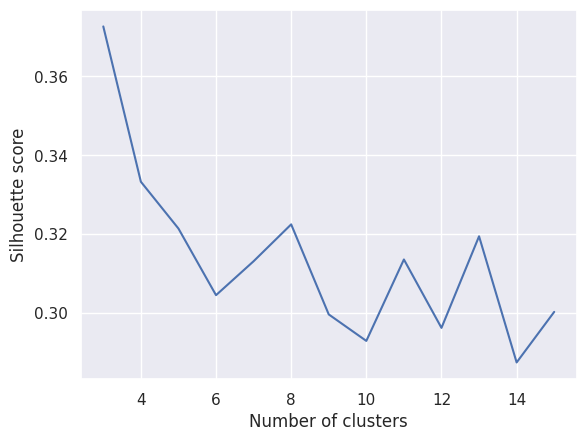

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(x = list(silhouette_scores.keys()), y = list(silhouette_scores.values()))
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

**Question:** What value of $k$ would you choose based on Silhouette analysis?  Briefly justify.

**A19: put your answer here (maximum 1 sentence)**
> I'd choose the value k = 3 since it has the highest Silhouette score of 0.3727077659683769, indicating the most well-separated clusters.




## Question 20 (2 points)


Perform $k$-means clustering using the value of $k$ from Q19. Save the result as `kmeans_q20`, and make a vector `y_kmeans_q20` of the category labels predicted by this clustering.

In [25]:
# Question
# Make sure to use the arguments `n_init = 10` and `random_state = 42` for clustering

k_q20 = 3

kmeans_q20 = KMeans(n_clusters=k_q20, n_init=10, random_state=42)
kmeans_q20.fit(mystery_vowels)

y_kmeans_q20 = kmeans_q20.labels_

print(y_kmeans_q20)

[1 1 2 0 1 1 2 1 2 0 1 1 2 2 2 0 1 1 2 2 2 0 1 1 2 2 2 0 1 1 2 2 2 0 1 1 2
 2 2 0 1 1 2 2 2 0 1 1 2 2 2 0 1 1 1 1 2 0 1 1 2 2 2 0 1 1 2 2 2 0 1 1 2 2
 2 0 1 1 2 2 2 0 1 1 2 2 2 0 1 1 2 2 2 0 1 1 2 2 2 0 1 1 2 2 2 0 1 1 2 2 2
 0 1 1 2 2 2 0 1 1]


## Question 21 (3 points)
Make a 1x2 array of F1/F2 plots like in Q17, but now using `kmeans_q20` and  `y_kmeans_q20`.

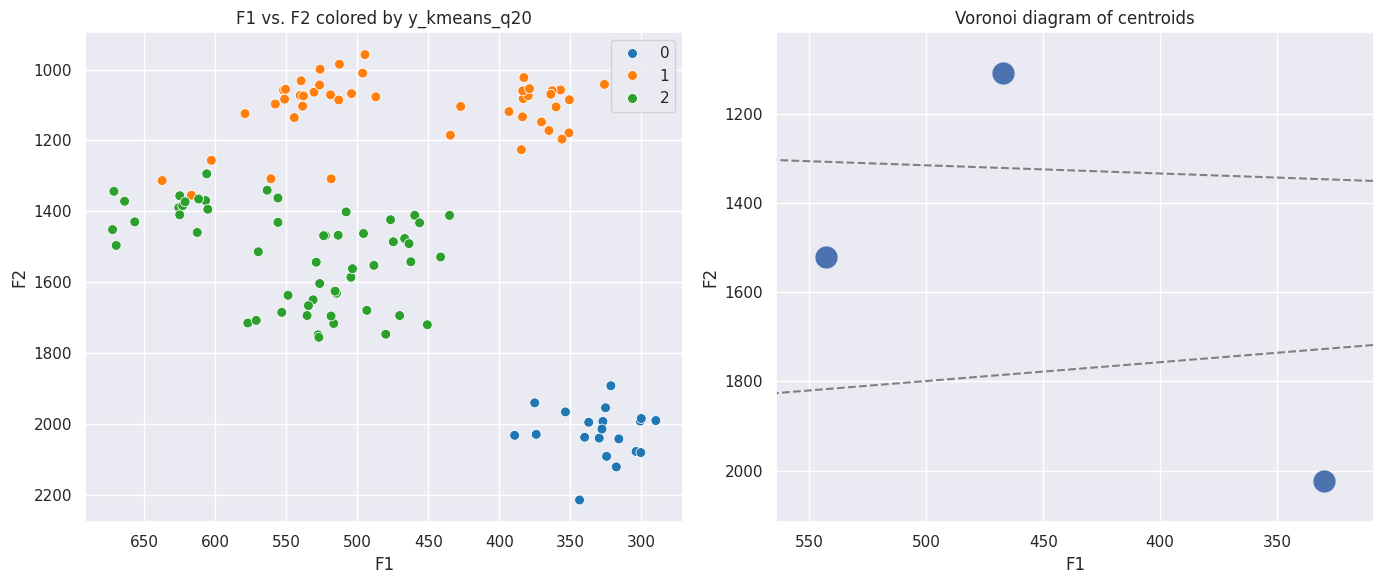

In [26]:
# Question

# your code here
from scipy.spatial import Voronoi, voronoi_plot_2d

f1 = mystery_vowels["F1"].values
f2 = mystery_vowels["F2"].values

centroids = kmeans_q20.cluster_centers_[:, [1, 2]]

fig, subplot_array = plt.subplots(1, 2, figsize=(14, 6))

sns.scatterplot(x=f1, y=f2, hue=y_kmeans_q20, palette="tab10", ax=subplot_array[0], s=50)
subplot_array[0].set_title("F1 vs. F2 colored by y_kmeans_q20")
subplot_array[0].invert_xaxis()
subplot_array[0].invert_yaxis()
subplot_array[0].set_xlabel("F1")
subplot_array[0].set_ylabel("F2")

voronoi = Voronoi(centroids)
voronoi_plot_2d(voronoi, ax=subplot_array[1], show_vertices=False, line_colors='gray', line_width=1.5, point_size=30)
subplot_array[1].scatter(centroids[:, 0], centroids[:, 1], color='red', marker='X', s=100)
subplot_array[1].set_title("Voronoi diagram of centroids")
subplot_array[1].invert_xaxis()
subplot_array[1].invert_yaxis()
subplot_array[1].set_xlabel("F1")
subplot_array[1].set_ylabel("F2")

plt.tight_layout()
plt.show()

# Section 9

We now try GMM clustering.



## Question 22 (2 points)

We will do GMM clustering for the same range of $k$ as above (3--15), and choose the one with the best BIC.

First: write a function `gmm_k_bic` that takes as inputs:

* `X`: a feature matrix where each column is one feature (like our `X`)
* `k`: the number of components of the GMM

and does the following:

* Fit a GMM with **tied covariance matrix** to `X`
* Return the BIC value for this GMM

In [27]:
# Question
# Make sure to use the arguments `n_init = 10` and `random_state = 42` for clustering

# your code here
from sklearn.mixture import GaussianMixture

def gmm_k_bic(X, k):
    gmm = GaussianMixture(n_components=k, covariance_type='tied', n_init=10, random_state=42)
    gmm.fit(X)
    return gmm.bic(X)

## Question 23 (2 points)

Write code resulting in a dictionary `gmm_scores` such that:

* `gmm_scores[3]` is the BIC value for the GMM fit to `X` with $k = 3$
* etc.


In [28]:
# Question

# your code here
gmm_scores = {}

for k in range(3, 16):
    gmm_scores[k] = gmm_k_bic(mystery_vowels, k)

print(gmm_scores)

{3: np.float64(7393.812710407596), 4: np.float64(7342.71635559749), 5: np.float64(7306.534352028501), 6: np.float64(7263.468209803987), 7: np.float64(7282.390461983065), 8: np.float64(7287.232556126997), 9: np.float64(7302.935858717468), 10: np.float64(7295.131029783483), 11: np.float64(7312.3224977213495), 12: np.float64(7326.606623874314), 13: np.float64(7345.584366121286), 14: np.float64(7357.936687633328), 15: np.float64(7376.9396564431445)}


## Question 24 (2 points)

Run the following code, which should generate a figure showing the BIC ($y$-axis) as a function of $k$ ($x$-axis):

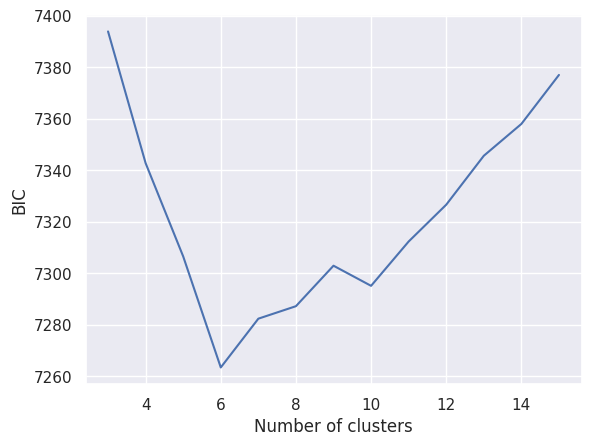

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(x = list(gmm_scores.keys()), y = list(gmm_scores.values()))
plt.xlabel('Number of clusters')
plt.ylabel('BIC')
plt.show()

**Question:** What value of $k$ would you choose based on this plot?  Briefly justify.  

*Hint*: make sure you are considering the right direction for BIC, which is sometimes defined so higher = better and sometimes so lower = better.

**A24: put your answer here (maximum 1 sentence)**
> I'd choose the value k=6 based on the plot since it yields the lowest BIC score, indicating the best balance between model fit and complexity.



## Question 25 (2 points)

* Fit a GMM with **tied covariance matrix** using the value of $k$ from Q24 and save the result as `gmm_q25`.
* Make a vector `y_gmm_q25` of the category labels predicted by this clustering.

In [30]:
# Question
# Make sure to use the arguments `n_init = 10` and `random_state = 42` for clustering

# your answer here
gmm_q25 = GaussianMixture(n_components=6, covariance_type='tied', n_init=10, random_state=42)
gmm_q25.fit(mystery_vowels)

y_gmm_q25 = gmm_q25.predict(mystery_vowels)

print(y_gmm_q25)

[0 0 5 1 3 4 2 0 5 1 3 4 2 0 5 1 3 4 2 0 5 1 3 4 2 0 5 1 3 4 2 0 5 1 3 4 2
 0 5 1 3 4 2 0 5 1 3 4 2 0 5 1 3 4 2 0 5 1 3 4 2 0 5 1 3 4 2 0 5 1 3 4 2 0
 5 1 3 4 2 0 5 1 3 4 2 0 5 1 3 4 2 0 5 1 3 4 2 0 5 1 3 4 2 0 5 1 3 4 2 0 5
 1 3 4 2 0 5 1 3 4]


## Question 26 (2 points + 4 points extra credit)
Make a 1x2 array of F1/F2 plots, such that:

* The left plot shows each point colored by its value of `y_gmm_q25` (the predicted category label), like Q17 and Q21 (2 points)
* The right plot shows one 95% confidence ellipse for each category. (4 points extra credit)

While there is code you can adapt for this in the Classification CoLab, it may contain a bug you have to figure out how to fix.  

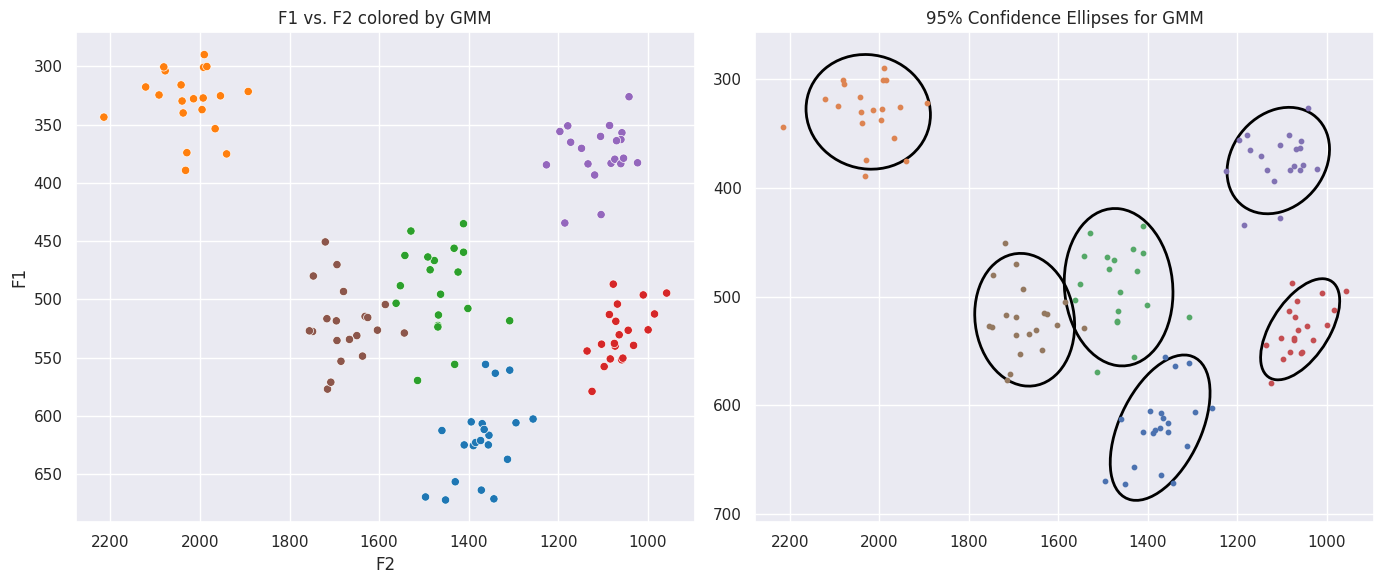

In [34]:
# Question

# your code here
from matplotlib.patches import Ellipse
figure, subplot_array = plt.subplots(1, 2, figsize=(14, 6))

sns.scatterplot(data=mystery_vowels, x='F2', y='F1', hue=y_gmm_q25, palette='tab10', ax=subplot_array[0], legend=False)
subplot_array[0].set_title('F1 vs. F2 colored by GMM')
subplot_array[0].invert_yaxis()
subplot_array[0].invert_xaxis()

subplot_array[1].set_title('95% Confidence Ellipses for GMM')
subplot_array[1].invert_yaxis()
subplot_array[1].invert_xaxis()

for cluster in np.unique(y_gmm_q25):
    row = mystery_vowels[y_gmm_q25 == cluster][["F2", "F1"]]

    if len(row) < 2:
        continue

    mean = row.mean().values
    covariance = np.cov(row.T)
    eigenvalues, eigenvactors = np.linalg.eigh(covariance)
    order = eigenvalues.argsort()[::-1]
    eigenvalues = eigenvalues[order]
    eigenvactors = eigenvactors[:, order]
    theta = np.degrees(np.arctan2(*eigenvactors[:, 0][::-1]))
    width, height = 2 * 1.96 * np.sqrt(eigenvalues)
    ellipse = Ellipse(xy=mean, width=width, height=height, angle=theta, edgecolor='black', fc='none', lw=2)
    subplot_array[1].add_patch(ellipse)
    subplot_array[1].scatter(row["F2"], row["F1"], s=10)

plt.tight_layout()
plt.show()

## Question 27 (3 points)


A common situation in unsupervised learning is different methods giving different results, and the analyst has to decide which is most plausible using domain knowledge. There is no quantitative criterion for this because $y$ is not known.

Compare the clusterings chosen using $k$-means and GMM clustering:

* The $k$ values from Q19 and Q24
* The plots in Q21 and Q26

Which clustering is more plausible? Justify your answer.

**A27: Your answer here (2-3 sentences)**
> The value of k = 6 found using GMM clustering happens to be more plausible than the value k = 3 found using k-means which alignes better with the typical range of vowels in natural languages. In Q26, the clusters are better separated and confidence ellipses reflect that variation. However, the k-means method in Q21 results in overgeneralization in the graph which corresponds to incorrect merging of different vowel categories.



# To Submit
To submit:
* Name this notebook `YOUR_STUDENT_ID_Assignment_6.ipynb` and download it.
* Convert this `.ipynb` file to a `.pdf` (e.g., using the following instructions).  
* Upload the PDF to the Gradescope assignment "Assignment 6".
   * **<font color='red'>Make sure to match your answers to page numbers when submitting the PDF on Gradescope. Failure to do so will result in UP TO 10 POINTS BEING DEDUCTED.</font>**  
* Submit the `.ipynb` file on myCourses under Assignment 6.

(Note: `Print > Save as PDF` **will not work** because it will not display your figures correctly.)

You can convert the notebook to a PDF using the following instructions.

# Converting this notebook to a PDF

1. Make sure you have renamed the notebook, e.g. `000000000_Assignment_6.ipynb` where `000000000` is your student ID.
2. Make sure to save the notebook (`ctrl/cmd + s`).

Make sure Google Drive is mounted (it likely already is from the first question).

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
!ls "/content/drive/My Drive/Colab Notebooks/"

3. Install packages for converting .ipynb to .pdf

In [ ]:
!apt-get -q install texlive-xetex texlive-fonts-recommended texlive-plain-generic
!apt-get install -y pandoc

4. Convert to PDF (replace `000000000` with your student ID)

In [ ]:
%env STUDENT_ID=261138642
!jupyter nbconvert --to pdf "/content/drive/My Drive/Colab Notebooks/${STUDENT_ID}_Assignment_6.ipynb"

5. Download the resulting PDF file. If you are using Chrome, you can do so by running the following code. On other browsers, you can download the PDF using the file mananger on the left of the screen (Navigate to the file > Right Click > Download).

In [ ]:
import os
from google.colab import files
files.download(f"/content/drive/My Drive/Colab Notebooks/{os.environ['STUDENT_ID']}_Assignment_6.pdf")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

6. Verify that your PDF correctly displays your figures and responses.

7. **<font color='red'>Remember to match your answers to page numbers when submitting the PDF on Gradescope!</font>**